In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv('StudentStatistics.csv', sep = ';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [3]:
# H0 - The teaching motivation does not affect the overall grade of the students
# Ha - The teaching motivation does affect the overall grade of the students

# Grouping the Ordinal and the Scale data columns

data.groupby('Teach_Motivate')['Over_Grade'].agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
Teach_Motivate,,,,,
Agree,78.000000,75.0,12.179217,65.0,98.0
Disagree,52.777778,50.0,18.219343,20.0,80.0
Fully Disagree,36.812500,38.0,14.725120,10.0,65.0
Fully agree,84.600000,85.0,10.526158,70.0,98.0
Neither disagree nor agree,69.181818,70.0,16.898628,30.0,100.0


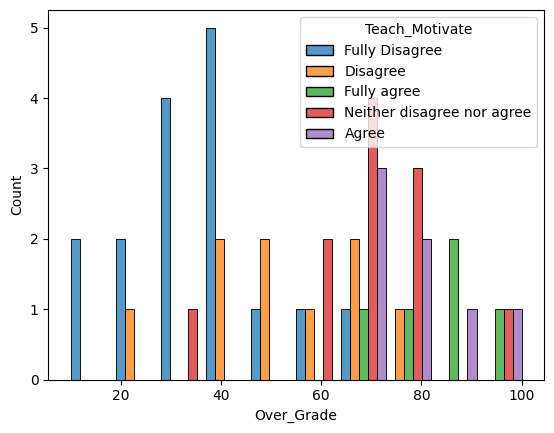

In [4]:
# importing the seaborn module

import seaborn as sns

sns.histplot(data = data, x= 'Over_Grade', hue = 'Teach_Motivate',  bins = 10, multiple='dodge')
plt.show()

In [5]:
data['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [6]:
coding = {'Fully Disagree':0, 'Disagree':1, 'Neither disagree nor agree':2, 'Agree':3, 'Fully agree':4}

In [7]:
mydata = data[['Teach_Motivate', 'Over_Grade']]

mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)

<ipython-input-7-e4601c596a82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)


In [8]:
mydata.corr(method='spearman')

,Teach_Motivate,Over_Grade
Teach_Motivate,1.0000,0.7872
Over_Grade,0.7872,1.0000


In [9]:
# implementing the spearman test

from scipy.stats import spearmanr

spearmanr(mydata, nan_policy='omit')

SignificanceResult(statistic=0.7871998951252405, pvalue=3.236363793284169e-11)

In [10]:
statistic=0.7871998951252405
pvalue=3.236363793284169e-11

rho = abs(statistic)

if rho < 0.10:
  print('Negligible')
elif rho < 0.20:
  print('weak')
elif rho < 0.40:
  print('moderate')
elif rho < 0.60:
  print('relatively strong')
elif rho < 0.80:
  print('strong')
else:
  print('very strong')

strong


Thus we can say that both the data columns 'Teach_Motivate' and 'Over_Grade' has a strong impact.